In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

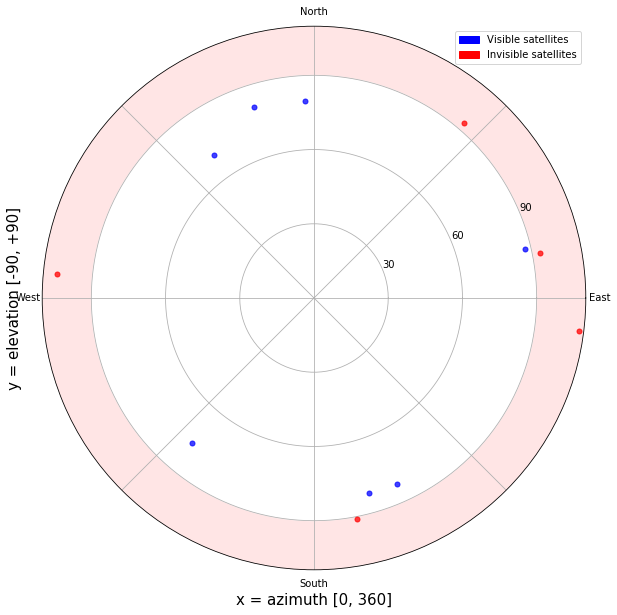

In [3]:
from tracker import plotter

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 20

plotter.plot_az_el(az, el)
plt.show()

In [4]:
OBS_LAT = -15.989620
OBS_LON = -48.044411
OBS_ALT = 500 # meters

ISS_TLE = ('1 25544U 98067A   18264.87214538 -.00000479 +00000-0 +00000-0 0 9990',
           '2 25544 051.6411 256.8919 0004651 185.2142 246.8508 15.53744581133552')

In [5]:
from tracker.satellite import Satellite
from datetime import datetime, timezone

iss = Satellite(ISS_TLE[0], ISS_TLE[1])
utc_satview = datetime(year=2018, month=9, day=22, hour=20, minute=37, second=30, tzinfo=timezone.utc)

iss_position, v = iss.propagate(utc_satview)

print('iss_position = {}'.format(iss_position))
b = (768350.0713588104, 6538760.196343955, -1632694.711713458)

print(iss_position == b)

iss_position = (768350.0713588104, 6538760.196343955, -1632694.711713458)
True


STEP = 1


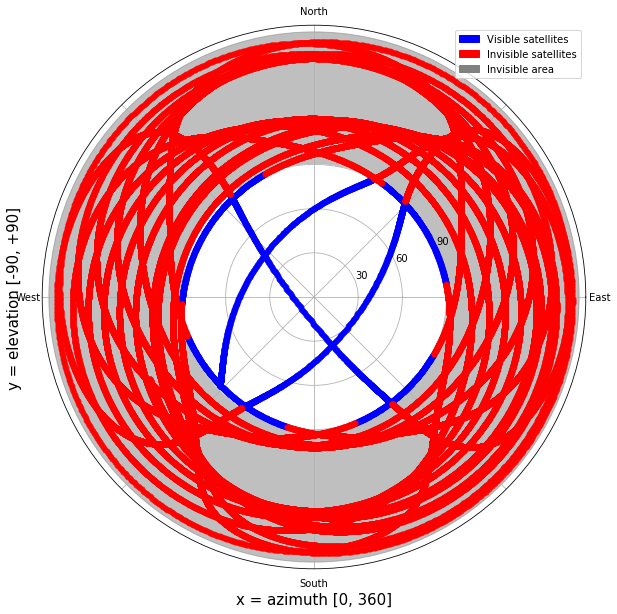

In [25]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=3,
                 hour=11,
                 minute=57,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=10**5)
plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=100000, annotate=False)
plt.show()

STEP = 14


,Azimuth,Elevation,Time
1,226.485603,1.845741,2018-10-03 14:57:00+00:00
2,226.988353,2.804343,2018-10-03 14:57:14+00:00
3,227.544040,3.812967,2018-10-03 14:57:28+00:00
4,228.161081,4.878886,2018-10-03 14:57:42+00:00
5,228.849766,6.010782,2018-10-03 14:57:56+00:00
6,229.622788,7.219045,2018-10-03 14:58:10+00:00
7,230.495980,8.516195,2018-10-03 14:58:24+00:00
8,231.489314,9.917376,2018-10-03 14:58:38+00:00
9,232.628308,11.440962,2018-10-03 14:58:52+00:00
10,233.946011,13.109274,2018-10-03 14:59:06+00:00


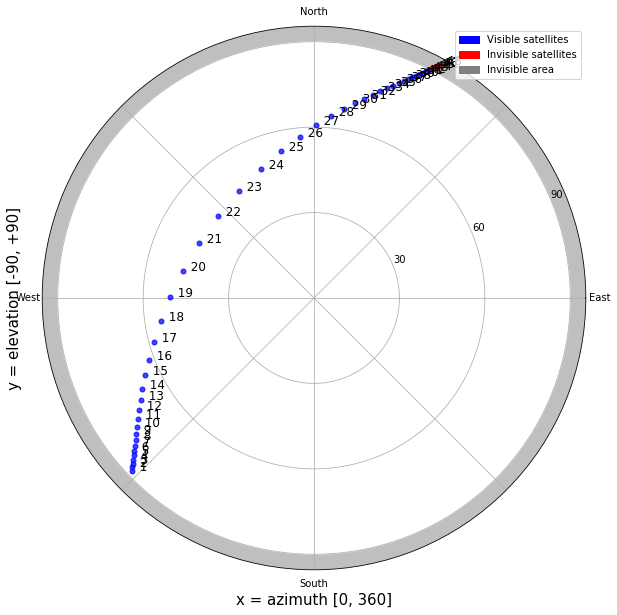

In [26]:
end = start + timedelta(seconds=660)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=50, annotate=True)
display(df)
plt.show()